In [4]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import random
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import bigrams, trigrams
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer, WordNetLemmatizer
import missingno as msno
from nltk.stem import PorterStemmer, WordNetLemmatizer
import pandas as pd
%matplotlib inline

In [12]:
df=pd.read_csv('C:/Users/gouta/OneDrive - andrew.cmu.edu/Documents/CMU_Fall_2024/95851_DSPM/HW3/complaints.csv',encoding='ISO-8859-1')

In [14]:
df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,6/1/23,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,FactorTrust run by XXXX have another consumer ...,NaN,Factor Trust,OH,44708,NaN,Consent provided,Web,6/1/23,Closed with explanation,Yes,NaN,7059212
1,6/1/23,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,"To Whom It May Concern, I purchased an XXXX a...",NaN,GOLDMAN SACHS BANK USA,CA,92308,Older American,Consent provided,Web,6/1/23,Closed with explanation,Yes,NaN,7059423
2,6/1/23,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,"Hello, My name is XXXX XXXX. \n\nI am trying t...",NaN,SN SERVICING CORPORATION,MD,208XX,Older American,Consent provided,Web,6/1/23,Closed with explanation,Yes,NaN,7055447
3,6/1/23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,n accordance with the fair credit Reporting ac...,NaN,"EQUIFAX, INC.",OH,44224,NaN,Consent provided,Web,6/1/23,Closed with explanation,Yes,NaN,7054855
4,6/1/23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,I reviewed my Consumer Reports and noticed tha...,NaN,"EQUIFAX, INC.",FL,33186,NaN,Consent provided,Web,6/1/23,Closed with non-monetary relief,Yes,NaN,7054955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42754,8/14/23,"Payday loan, title loan, or personal loan",Installment loan,Getting the loan,NaN,I had called and talked to one of the customer...,Company believes the complaint provided an opp...,MoneyLion Inc.,UT,84117,Servicemember,Consent provided,Web,8/14/23,Closed with explanation,Yes,NaN,7395621
42755,8/14/23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,The following Inquiries are NOT mine and i nev...,Company has responded to the consumer and the ...,"Fidelity National Information Services, Inc. (...",NJ,070XX,NaN,Consent provided,Web,8/14/23,Closed with explanation,Yes,NaN,7393478
42756,8/14/23,Debt collection,Medical debt,Attempts to collect debt not owed,Debt is not yours,"XXXX XXXX XXXX XXXX or XXXX XXXX XXXX, XXXX. ...",Company believes it acted appropriately as aut...,"P&B Capital Group, LLC",NC,27455,NaN,Consent provided,Web,8/14/23,Closed with explanation,Yes,NaN,7399997
42757,8/15/23,Debt collection,Payday loan debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,I took out a personal loan with XXXX XXXX and ...,Company believes it acted appropriately as aut...,"LDF Holdings, LLC",MD,20602,NaN,Consent provided,Web,8/15/23,Closed with explanation,Yes,NaN,7402347


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42759 entries, 0 to 42758
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date received                 42759 non-null  object 
 1   Product                       42759 non-null  object 
 2   Sub-product                   42759 non-null  object 
 3   Issue                         42759 non-null  object 
 4   Sub-issue                     40225 non-null  object 
 5   Consumer complaint narrative  42759 non-null  object 
 6   Company public response       29920 non-null  object 
 7   Company                       42759 non-null  object 
 8   State                         42640 non-null  object 
 9   ZIP code                      42759 non-null  object 
 10  Tags                          4543 non-null   object 
 11  Consumer consent provided?    42759 non-null  object 
 12  Submitted via                 42759 non-null  object 
 13  D

<Axes: >

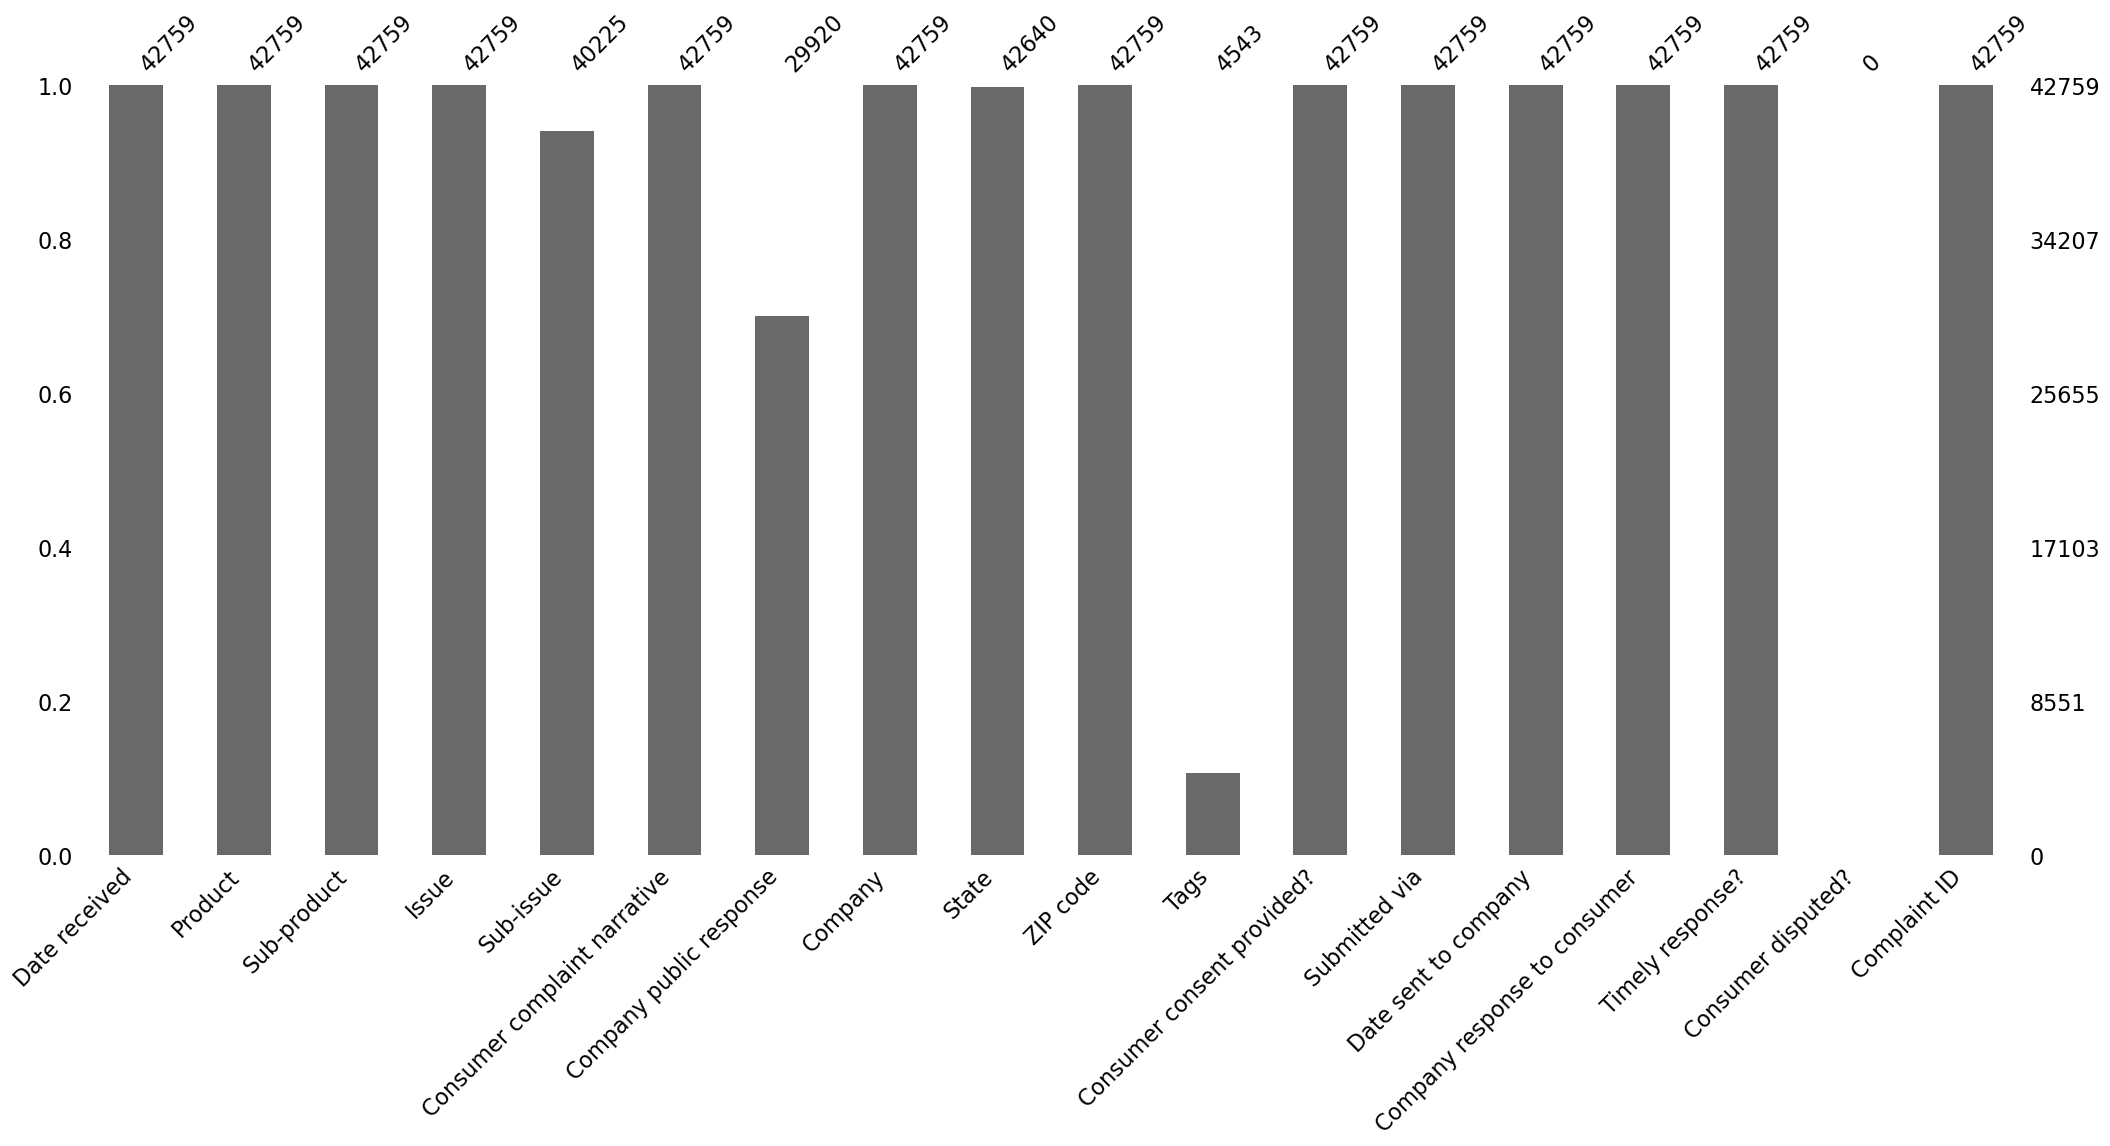

In [18]:
msno.bar(df)

<h2>1. Cleaning and Tokenization</h2>

In [23]:
df = df[df['Consumer complaint narrative'].notnull()]

In [25]:
# converting it to lowercase

df['Consumer complaint narrative'] = df['Consumer complaint narrative'].str.lower()
for i in df['Consumer complaint narrative'].sample(50):
    print("Text: ",i,'\n')

Text:  this is my numerous request that i have been a victim of identity theft and that no one seems to care, that i want to dispute specific records in my credit file that do not belong to me, or that i have signed any agreement. the items i'm challenging have nothing to do with any transactions i've done or authorized to gain products, services, or money. please remove the following items xxxx xxxx xxxx balance : {$1400.00} xxxx xxxx  xxxx balance : {$11000.00} xxxx xxxx xxxx xxxx balance : {$3300.00} xxxx xxxx xxxx xxxx xxxx xxxx xxxx {$12000.00} xxxx xxxx  xxxx balance : {$11000.00} xxxx xxxx xxxxxxxx balance : {$6000.00} xxxx xxxx  xxxx : {$11000.00} 

Text:  this is a formal complaint that the credit reporting agency. i sent several disputes dated xx/xx/2023, xx/xx/2023, and xx/xx/2023. but xxxx, xxxx, and transunion have ignored my previous request and failed to maintain reasonable procedures in their operations to assure the maximum possible accuracy that states under 15 u.s.c.

In [27]:
# Remove punctuation from the text
def remove_punc(text):
    punc_pattern = r'[^\w\s]'
    return re.sub(punc_pattern, '', text)

df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(remove_punc)

qawerqeq Hello 


In [29]:
df['Consumer complaint narrative']

0        factortrust run by xxxx have another consumer ...
1        to whom it may concern i purchased an xxxx  at...
2        hello my name is xxxx xxxx \n\ni am trying to ...
3        n accordance with the fair credit reporting ac...
4        i reviewed my consumer reports and noticed tha...
                               ...                        
42754    i had called and talked to one of the customer...
42755    the following inquiries are not mine and i nev...
42756    xxxx xxxx xxxx  xxxx or xxxx xxxx xxxx xxxx th...
42757    i took out a personal loan with xxxx xxxx and ...
42758    i told the xxxx xxxx xxxx at xxxx to reinvesti...
Name: Consumer complaint narrative, Length: 42759, dtype: object

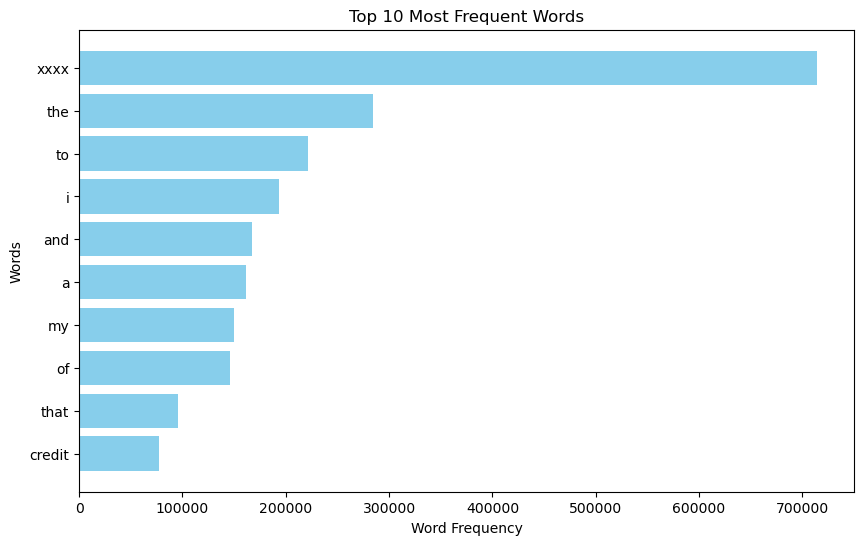

In [31]:
from collections import Counter

# Concatenate all the narratives into a single string
all_narratives = ' '.join(df['Consumer complaint narrative'])

# Tokenize the text and count word frequencies
word_counts = Counter(all_narratives.split())
#The split() method is used to tokenize the text, i.e., 
#it breaks the text into individual words. Then, Counter is used to count 
#the frequency of each unique word in the tokenized text.



# Convert the word counts into a list of tuples for sorting
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
''' 
x: Represents each item in the iterable being sorted (in this case, each item is a tuple 
where x[0] is the word, and x[1] is its frequency).
x[1]: Accesses the second element of the pair, which is the frequency of the word.
'''


# Extract the top N words and their counts
top_words = [word for word, count in sorted_word_counts[:10]]
top_counts = [count for word, count in sorted_word_counts[:10]]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_words, top_counts, color='skyblue')
plt.xlabel('Word Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Frequent Words')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency on top
plt.show()

In [33]:
word_counts

Counter({'xxxx': 714334,
         'the': 284618,
         'to': 221186,
         'i': 193373,
         'and': 167528,
         'a': 161266,
         'my': 150274,
         'of': 145768,
         'that': 95280,
         'credit': 77361,
         'is': 76392,
         'this': 74923,
         'not': 73209,
         'in': 73171,
         'on': 65599,
         'account': 65222,
         'have': 64081,
         'information': 58517,
         'consumer': 57603,
         'was': 55305,
         'report': 53829,
         'with': 52261,
         'for': 47380,
         'it': 46875,
         'any': 46557,
         'they': 46556,
         'reporting': 45763,
         'xxxxxxxx': 44561,
         'me': 43456,
         'as': 39170,
         'or': 38947,
         'from': 36679,
         '15': 36023,
         'be': 31382,
         'by': 30256,
         'usc': 29132,
         'you': 28882,
         'are': 28626,
         'has': 26705,
         'section': 25575,
         'no': 23380,
         'an': 22729,


<h4>Stopword handling</h4>

In [36]:
#Handling stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gouta\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gouta\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [46]:
stop_words = set(stopwords.words('english'))

# Tokenize and preprocess the text data
all_narratives = ' '.join(df['Consumer complaint narrative'])
words = word_tokenize(all_narratives)
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Now 'words' contains the preprocessed text data without stopwords

In [44]:
# Generate bigrams and trigrams
bigram_list = list(bigrams(words))
trigram_list = list(trigrams(words))

# Calculate frequencies of bigrams and trigrams
bigram_freq = FreqDist(bigram_list)
trigram_freq = FreqDist(trigram_list)

# Print most common bigrams and trigrams
print("Top 10 most common bigrams:")
print(bigram_freq.most_common(10))

print("\nTop 10 most common trigrams:")
print(trigram_freq.most_common(10))

Top 10 most common bigrams:
[(('xxxx', 'xxxx'), 551642), (('credit', 'report'), 24984), (('xxxx', 'xxxxxxxx'), 19170), (('xxxxxxxx', 'xxxx'), 18490), (('consumer', 'reporting'), 17712), (('reporting', 'agency'), 16522), (('usc', 'section'), 14041), (('xxxx', 'account'), 12676), (('credit', 'reporting'), 11975), (('consumer', 'report'), 10050)]

Top 10 most common trigrams:
[(('xxxx', 'xxxx', 'xxxx'), 462535), (('consumer', 'reporting', 'agency'), 15846), (('xxxx', 'xxxxxxxx', 'xxxx'), 12013), (('xxxxxxxx', 'xxxx', 'xxxx'), 11686), (('xxxx', 'xxxx', 'xxxxxxxx'), 11510), (('states', 'consumer', 'reporting'), 8522), (('fair', 'credit', 'reporting'), 8503), (('credit', 'reporting', 'act'), 8423), (('usc', 'section', 'states'), 8182), (('xxxx', 'xxxx', 'balance'), 7758)]


In [50]:
frequent_words = ["xxxx","xxxxxxxx","reporting","consumer","credit"]
def remove_frequent_words(text):
    # Split the tweet into words
    words = text.split()
    # Remove frequent words
    words = [word for word in words if word.lower() not in frequent_words and word.lower() not in stop_words]
    # Join the remaining words back into a string
    preprocessed_text = ' '.join(words)
    return preprocessed_text

# Apply the preprocess_text_column function to the text column and store the result in a new column
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].apply(remove_frequent_words)

In [54]:
# Extract 10 random samples
sample_df = df.sample(n=5)

sample_tweets = []
for i, row in sample_df.iterrows():
    tweet = f"Report {i+1}: {row['Consumer complaint narrative']}"
    sample_tweets.append(tweet)
print('\n\n'.join(sample_tweets))

Report 25260: complaint involves following company debt collectors international inc dci florida debtcollectorsinternationalcom owner company xxxx2023 provided dci several files collect behalf initially pleased services even referred colleagues furnished dci extra business phone conversation dci confirmed files domestication judgment made clear pay upfront actually court filing fees hourly lawyer fees convincing actual court filing fees upwards 180000 agreed accept 100000 via card cover remaining filing fee costs fund however since learned court filing fees searches even come close fact repeatedly lied court costs upwards numerous potential files asking multiple updates getting frustrated nothing anticipated promised phone happening dci wrote issue simply attorney send back unused costs pursue alternative means called attorney nv working case update said havent filed anything yet perhaps something filed weeks hearing nothing filed multiple weeks time file drag unacceptable confirmed lo

In [56]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gouta\AppData\Roaming\nltk_data...


True

In [58]:
def preprocess_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Perform stemming (using Porter Stemmer)
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in words]

    # Perform lemmatization (using WordNet Lemmatizer)
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join the processed words back into a sentence
    stemmed_text = ' '.join(stemmed_words)
    lemmatized_text = ' '.join(lemmatized_words)
    
    return stemmed_words, lemmatized_words

# Apply the preprocessing function to the 'Sound Bite Text' column
df['Stemmed Text'], df['Lemmatized Text'] = zip(*df['Consumer complaint narrative'].apply(preprocess_text))

In [60]:
df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Stemmed Text,Lemmatized Text
0,6/1/23,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,factortrust run another report copies reported...,NaN,Factor Trust,OH,44708,NaN,Consent provided,Web,6/1/23,Closed with explanation,Yes,NaN,7059212,"[factortrust, run, anoth, report, copi, report...","[factortrust, run, another, report, copy, repo..."
1,6/1/23,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,may concern purchased ca represented card paym...,NaN,GOLDMAN SACHS BANK USA,CA,92308,Older American,Consent provided,Web,6/1/23,Closed with explanation,Yes,NaN,7059423,"[may, concern, purchas, ca, repres, card, paym...","[may, concern, purchased, ca, represented, car..."
2,6/1/23,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,hello name trying sell home md made payment ti...,NaN,SN SERVICING CORPORATION,MD,208XX,Older American,Consent provided,Web,6/1/23,Closed with explanation,Yes,NaN,7055447,"[hello, name, tri, sell, home, md, made, payme...","[hello, name, trying, sell, home, md, made, pa..."
3,6/1/23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,n accordance fair act account violated rights ...,NaN,"EQUIFAX, INC.",OH,44224,NaN,Consent provided,Web,6/1/23,Closed with explanation,Yes,NaN,7054855,"[n, accord, fair, act, account, violat, right,...","[n, accordance, fair, act, account, violated, ..."
4,6/1/23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,reviewed reports noticed late payments account...,NaN,"EQUIFAX, INC.",FL,33186,NaN,Consent provided,Web,6/1/23,Closed with non-monetary relief,Yes,NaN,7054955,"[review, report, notic, late, payment, account...","[reviewed, report, noticed, late, payment, acc..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42754,8/14/23,"Payday loan, title loan, or personal loan",Installment loan,Getting the loan,NaN,called talked one customer care reps wanted pa...,Company believes the complaint provided an opp...,MoneyLion Inc.,UT,84117,Servicemember,Consent provided,Web,8/14/23,Closed with explanation,Yes,NaN,7395621,"[call, talk, one, custom, care, rep, want, pay...","[called, talked, one, customer, care, rep, wan..."
42755,8/14/23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,following inquiries mine never gave permission...,Company has responded to the consumer and the ...,"Fidelity National Information Services, Inc. (...",NJ,070XX,NaN,Consent provided,Web,8/14/23,Closed with explanation,Yes,NaN,7393478,"[follow, inquiri, mine, never, gave, permiss, ...","[following, inquiry, mine, never, gave, permis..."
42756,8/14/23,Debt collection,Medical debt,Attempts to collect debt not owed,Debt is not yours,balance 100000 account opened account opened f...,Company believes it acted appropriately as aut...,"P&B Capital Group, LLC",NC,27455,NaN,Consent provided,Web,8/14/23,Closed with explanation,Yes,NaN,7399997,"[balanc, 100000, account, open, account, open,...","[balance, 100000, account, opened, account, op..."
42757,8/15/23,Debt collection,Payday loan debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,took personal loan illegally charged interest ...,Company believes it acted appropriately as aut...,"LDF Holdings, LLC",MD,20

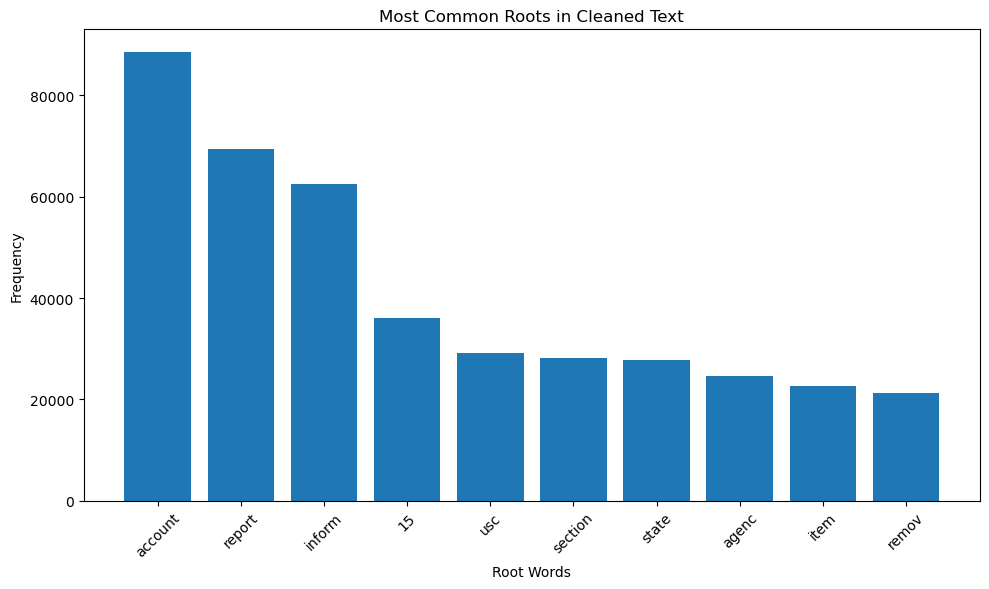

In [62]:
import matplotlib.pyplot as plt
from collections import Counter

cleaned_words_stemmed = [stem for stems_list in df['Stemmed Text'] for stem in stems_list]

# Use Counter to count the frequency of each root
word_freq = Counter(cleaned_words_stemmed)

# Get the most common roots
most_common_roots = word_freq.most_common(10)  

# Extract the roots and their frequencies for plotting
roots, frequencies = zip(*most_common_roots)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(roots, frequencies)
plt.xlabel('Root Words')
plt.ylabel('Frequency')
plt.title('Most Common Roots in Cleaned Text')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

<h2>2. Top 10 most common consumer complaint topics in Product category</h2>

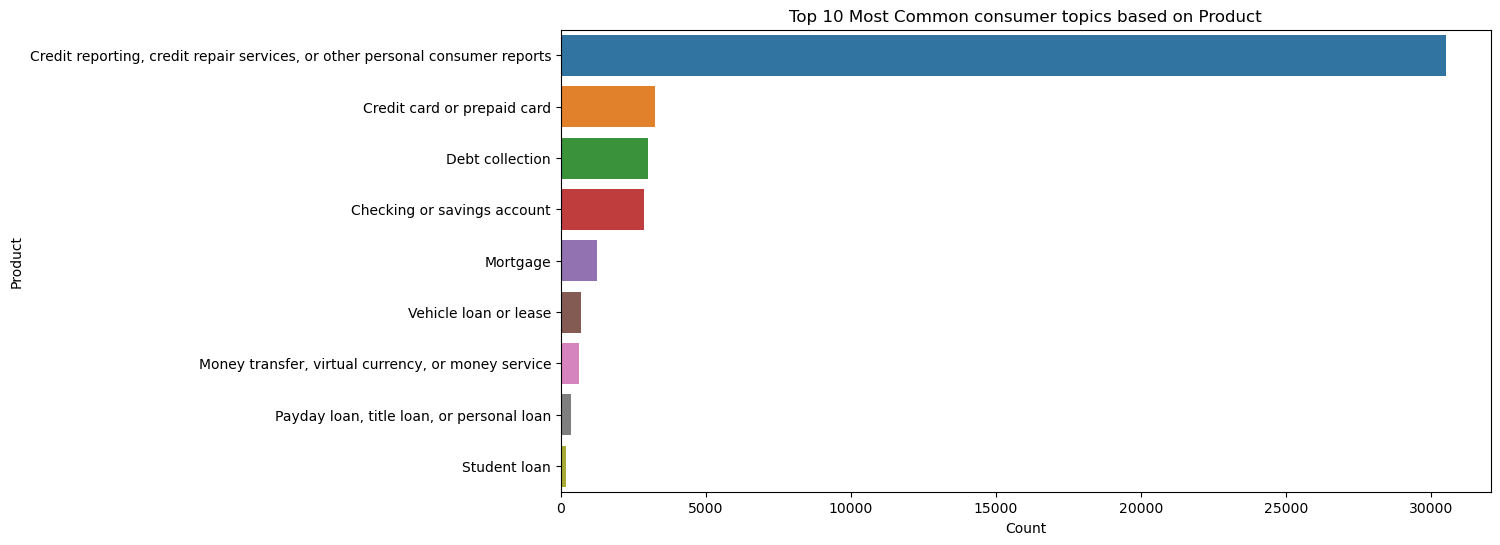

In [76]:
# Group and aggregate data to count occurrences
source_counts = df['Product'].value_counts().nlargest(10)

# Create a single subplot for visualizations
fig, ax = plt.subplots(figsize=(12, 6))

# Plot most common sources
sns.barplot(x=source_counts.values, y=source_counts.index, ax=ax)
ax.set_title('Top 10 Most Common consumer topics based on Product')
ax.set_xlabel('Count')
ax.set_ylabel('Product')

# Show the plot
plt.show()

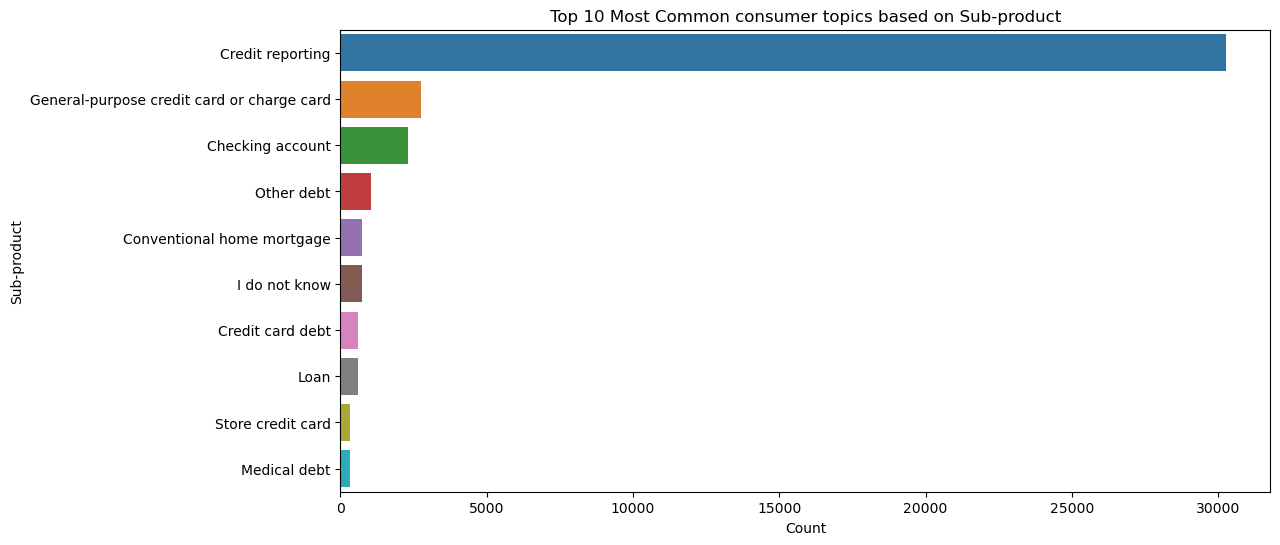

In [78]:
# Group and aggregate data to count occurrences
source_counts = df['Sub-product'].value_counts().nlargest(10)

# Create a single subplot for visualizations
fig, ax = plt.subplots(figsize=(12, 6))

# Plot most common sources
sns.barplot(x=source_counts.values, y=source_counts.index, ax=ax)
ax.set_title('Top 10 Most Common consumer topics based on Sub-product')
ax.set_xlabel('Count')
ax.set_ylabel('Sub-product')

# Show the plot
plt.show()

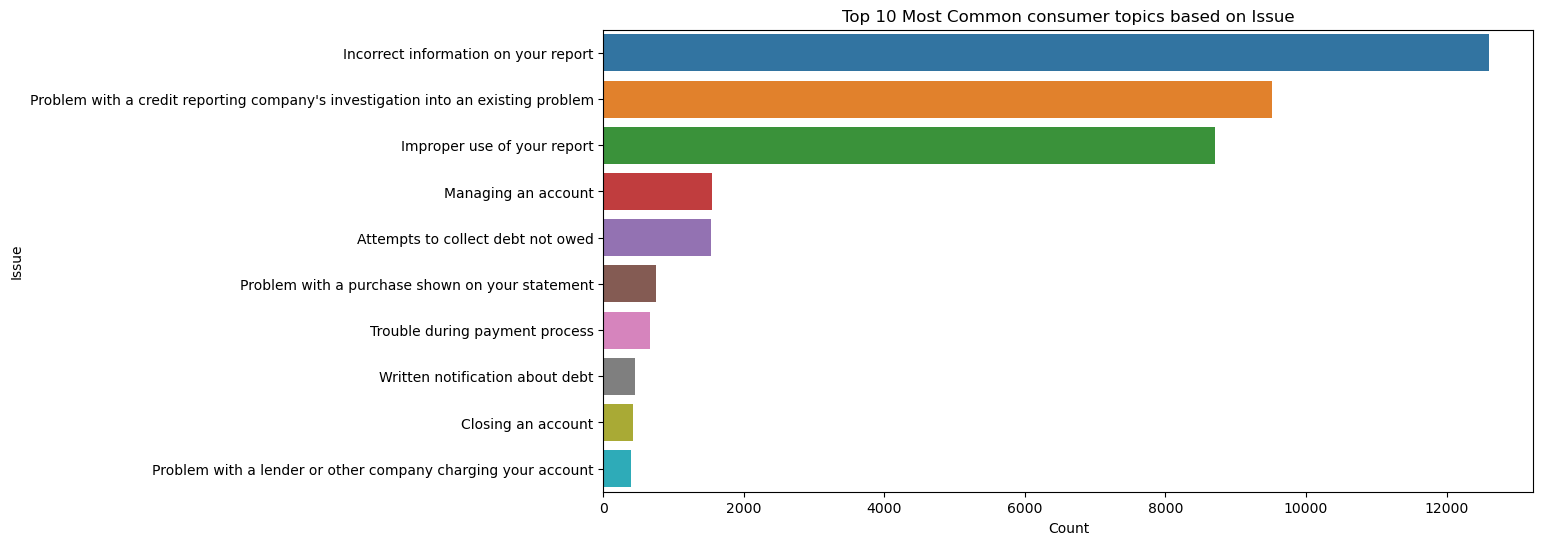

In [80]:
# Group and aggregate data to count occurrences
source_counts = df['Issue'].value_counts().nlargest(10)

# Create a single subplot for visualizations
fig, ax = plt.subplots(figsize=(12, 6))

# Plot most common sources
sns.barplot(x=source_counts.values, y=source_counts.index, ax=ax)
ax.set_title('Top 10 Most Common consumer topics based on Issue')
ax.set_xlabel('Count')
ax.set_ylabel('Issue')

# Show the plot
plt.show()

<h2>Step-3</h2>

<h3>3.1 Sentiment Analysis using Vader</h3>

We are interested in defining a range of sentiments as follows:-

- Strongly positive
- Moderately positive
- Neutral
- Moderately negative
- Strongly negative

In [87]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gouta\AppData\Roaming\nltk_data...


True

In [89]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(stem_list):
    stemmed_text = ' '.join(stem_list)
    return analyzer.polarity_scores(stemmed_text)['compound']

# Apply sentiment analysis to the 'Stemmed Text' column
df['Sentiment Score'] = df['Stemmed Text'].apply(get_sentiment_score)

# Define the sentiment ranges and assign scores
def assign_sentiment(score):
    if score < -0.5:
        return 1
    elif -0.5 <= score < -0.1:
        return 2
    elif -0.1 <= score < 0.1:
        return 3
    elif 0.1 <= score < 0.5:
        return 4
    else:
        return 5


df['Sentiment Score (1-5)'] = df['Sentiment Score'].apply(assign_sentiment)

In [91]:
df

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Stemmed Text,Lemmatized Text,Sentiment Score,Sentiment Score (1-5)
0,6/1/23,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,factortrust run another report copies reported...,NaN,Factor Trust,OH,44708,...,Web,6/1/23,Closed with explanation,Yes,NaN,7059212,"[factortrust, run, anoth, report, copi, report...","[factortrust, run, another, report, copy, repo...",-0.2263,2
1,6/1/23,Credit card or prepaid card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,may concern purchased ca represented card paym...,NaN,GOLDMAN SACHS BANK USA,CA,92308,...,Web,6/1/23,Closed with explanation,Yes,NaN,7059423,"[may, concern, purchas, ca, repres, card, paym...","[may, concern, purchased, ca, represented, car...",-0.5423,1
2,6/1/23,Mortgage,Conventional home mortgage,Trouble during payment process,NaN,hello name trying sell home md made payment ti...,NaN,SN SERVICING CORPORATION,MD,208XX,...,Web,6/1/23,Closed with explanation,Yes,NaN,7055447,"[hello, name, tri, sell, home, md, made, payme...","[hello, name, trying, sell, home, md, made, pa...",-0.3612,2
3,6/1/23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,n accordance fair act account violated rights ...,NaN,"EQUIFAX, INC.",OH,44224,...,Web,6/1/23,Closed with explanation,Yes,NaN,7054855,"[n, accord, fair, act, account, violat, right,...","[n, accordance, fair, act, account, violated, ...",0.5994,5
4,6/1/23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,reviewed reports noticed late payments account...,NaN,"EQUIFAX, INC.",FL,33186,...,Web,6/1/23,Closed with non-monetary relief,Yes,NaN,7054955,"[review, report, notic, late, payment, account...","[reviewed, report, noticed, late, payment, acc...",0.6868,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42754,8/14/23,"Payday loan, title loan, or personal loan",Installment loan,Getting the loan,NaN,called talked one customer care reps wanted pa...,Company believes the complaint provided an opp...,MoneyLion Inc.,UT,84117,...,Web,8/14/23,Closed with explanation,Yes,NaN,7395621,"[call, talk, one, custom, care, rep, want, pay...","[called, talked, one, customer, care, rep, wan...",0.7650,5
42755,8/14/23,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,following inquiries mine never gave permission...,Company has responded to the consumer and the ...,"Fidelity National Information Services, Inc. (...",NJ,070XX,...,Web,8/14/23,Closed with explanation,Yes,NaN,7393478,"[follow, inquiri, mine, never, gave, permiss, ...","[following, inquiry, mine, never, gave, permis...",0.0000,3
42756,8/14/23,Debt collection,Medical debt,Attempts to collect debt not owed,Debt is not yours,balance 100000 account opened account opened f...,Company believes it acted appropriately as aut...,"P&B Capital Group, LLC",NC,27455,...,Web,8/14/23,Closed with explanation,Yes,NaN,7399997,"[balanc, 100000, account, open, account, open,...","[balance, 100000, account, opened, account, op...",-0.9493,1
42757,8/15/23,Debt collection,Payday loan debt,Took or threatened to take negative or legal a...,Threatened or suggested your credit would be d...,took personal loan illegally charged interest ...,Company believes it acted appropriately as aut...,"LDF Holdings, LLC",MD,20602,...,Web,8/15/23,Closed with explanation,Yes,NaN,7402347,"[took, person, lo

In [93]:
# Group by sentiment rating
grouped = df.groupby('Sentiment Score (1-5)')

# Define a function to select two samples from each group
def get_two_samples(group):
    return group.sample(n=2)

# Apply the function to each group and concatenate the results
samples = grouped.apply(get_two_samples).reset_index(drop=True)

# Display the result
print(samples[['Sentiment Score (1-5)', 'Consumer complaint narrative']])

   Sentiment Score (1-5)                       Consumer complaint narrative
0                      1  recently sent dispute letter experian xxxx2023...
1                      1  become aware apple card continues excessively ...
2                      2  submitted letter bureaus delete erroneous item...
3                      2  xxxx23 notified via email wells fargo mobile a...
4                      3  hi submitting without influence third party bu...
5                      3  found bank account chase bank unauthorized cha...
6                      4  accordance fair act list accounts violated fed...
7                      4  patiently waiting response written requests se...
8                      5  new york ss date birth regular dispute take ac...
9                      5  update documents available submitted previousl...


In [97]:
for index, row in df.iterrows():
    print(f"Sentiment Rating: {row['Sentiment Score (1-5)']}")
    print(f"Consumer complaint narrative: {row['Consumer complaint narrative']}\n")

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



<h3>3.2 Sentiment Analysis using a Model</h3>

In [100]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Step 1: Feature Extraction

# max_features=1000 is set to limit the number of features to the top 1000 most important terms on TF-IDF scores
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['Consumer complaint narrative'])


# Step 2: Model Selection (Logistic Regression)
model = LogisticRegression(max_iter=1000)

# Step 3: Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, df['Sentiment Score (1-5)'], test_size=0.2, random_state=42)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}\n")

# Step 4: Top Features for Each Sentiment Rating
feature_names = vectorizer.get_feature_names_out()
top_features = {}
for i in range(1, 6):
    coef = model.coef_[i-1]
    top_features[i] = [feature_names[j] for j in coef.argsort()[:-10-1:-1]]

# Print top features for each sentiment rating
for sentiment, features in top_features.items():
    print(f"Sentiment Rating {sentiment}: {', '.join(features)}")

# Step 5: Display Sound Bites and Predictions
consumer_comps = df['Consumer complaint narrative'].sample(n=5)  # Choose 5 random sound bites for demonstration

consumer_comps_X = vectorizer.transform(consumer_comps)
predictions = model.predict(consumer_comps_X)

for i, (consumer_comp, prediction) in enumerate(zip(consumer_comps, predictions)):
    print(f"\nConsumer complaint {i+1}: {consumer_comp}")
    print(f"Predicted Sentiment Rating: {prediction}\n")


Accuracy: 0.7349158091674463

Sentiment Rating 1: fraud, failed, debt, complaint, stress, scam, wrong, distress, victim, block
Sentiment Rating 2: permitted, complaint, victim, wrong, impacted, pursue, debt, error, stolen, fraud
Sentiment Rating 3: confirm, influence, submitting, ground, looked, reseller, falsely, creditors, correction, requesting
Sentiment Rating 4: accordance, fair, like, list, acceptable, support, well, help, thank, appreciate
Sentiment Rating 5: interest, agreement, best, fair, treat, well, tx, good, help, support

Consumer complaint 1: reached cras inaccurate incomplete items report asking help deleting inaccurate incomplete items deleted per 15 usc 1681 information 100 accurate complete deleted
Predicted Sentiment Rating: 4


Consumer complaint 2: asked transunion assure maximum possible accuracy multiple inaccurate accounts file despite efforts transunion failed conduct reasonable fair investigation accounts 100 accurate lack response caused significant harm fin

<h3>OpenAI API</h3>

In [106]:
pip install openai


  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
   ---------------------------------------- 0.0/375.6 kB ? eta -:--:--
   ------ --------------------------------- 61.4/375.6 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 375.6/375.6 kB 4.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/191.0 kB ? eta -:--:--
   --------------------------------------- 191.0/191.0 kB 11.3 MB/s eta 0:00:00
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0


In [108]:
import os
import openai
from openai import OpenAI

In [134]:
client = OpenAI(
    api_key="<removed the code>",
)

In [136]:
# function for calling the model and the prompt

def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0, 
    )
    return(response.choices[0].message.content)

<h3>4.1 Generation of 1-2 sentences</h3>

In [138]:
# Extract 10 random samples
sample_df = df.sample(n=20)

consumer_comp = []
for i, row in sample_df.iterrows():
    comp = f"Consumer complaint {i+1}: {row['Consumer complaint narrative']}"
    consumer_comp.append(comp)

# Combine the sample tweets into a single string called 'prompt'
sample_details = '\n\n'.join(consumer_comp)
print(sample_details)

Consumer complaint 33117: accordance fair act list accounts violated federally protected rights privacy confidentiality 15 usc 1681 letters stated items issues 15 usc 1681 section 602 states right privacy 15 usc 1681 section 604 section 2 also states agency furnish account without written instructions 15 usc 1681c 5 section states agency may make report containing following items information adverse item information records convictions crimes antedates report seven years 15 usc 1681s2 1 person shall furnish information relating agency person knows reasonable cause believe information inaccurate

Consumer complaint 30171: open accounts strongly suspect fraudulent requesting investigate take necessary action remove report

Consumer complaint 2426: xxxx2022 ordered two 36x36 frameless bathroom mirrors mirrors delivered shipped encased formfitting styrofoam separate boxes opening first box revealed shattered mirror second one held intact mirror several deep scratches went unnoticed time co

In [140]:
prompt = f"""
Your task is to generate a 1-2 sentence summary of the key issues and
Evaluate the quality of the summaries:
```{sample_details}```
"""
response = get_completion(prompt)
print(response)

Key issues: Consumer complaints regarding violations of federally protected rights, privacy, and confidentiality under the Fair Credit Reporting Act (FCRA), including inaccurate reporting, fraudulent accounts, and unverified information.

Quality of summaries: The summaries provide a concise overview of the key issues raised in the consumer complaints, highlighting the common themes of FCRA violations, inaccurate reporting, and privacy concerns. They effectively capture the main points of each complaint.


<h3>4.2 Text generation(Constructive feedback) of a narrative with low sentiment score</h3>

In [154]:
unhappy_consumer = df[df['Sentiment Score (1-5)'] == 1]

selected_indices = random.sample(list(unhappy_consumer.index), 10)
selected_complaint = unhappy_consumer.loc[selected_indices, 'Consumer complaint narrative'].tolist()

sample_details = "\n\n".join([f"complain {i + 1}: {complaint}" for i, complaint in enumerate(selected_complaint)])

In [150]:
prompt = f"""
Your task is to explain why the customer was unhappy or provide constructive feedback to improve the situation:
```{sample_details}```
"""
response = get_completion(prompt)
print(response)

The customer seems to be unhappy with the debt collection practices of the company. They mention not receiving proper notifications regarding the debt collection, being a victim of identity theft, and facing issues with inaccurate information on their credit report. The customer also expresses frustration with the company's communication and harassment for payment. 

To improve the situation, the company should ensure that they are following the Fair Debt Collection Practices Act (FDCPA) by providing proper written notifications to customers, especially regarding debt collection. They should also take immediate action to address any identity theft issues and inaccuracies on the customer's credit report. Additionally, the company should respect the customer's request to cease communication and harassment for payment. It is important for the company to handle these matters promptly and professionally to avoid further dissatisfaction from the customer.


<h3>4.3 Predictive words for each sentiment rating</h3>

In [156]:
unhappy_consumer = df[df['Sentiment Score (1-5)'] == 2]

selected_indices = random.sample(list(unhappy_consumer.index), 10)
selected_complaint = unhappy_consumer.loc[selected_indices, 'Consumer complaint narrative'].tolist()

sample_details = "\n\n".join([f"word {i + 1}: {word}" for i, word in enumerate(selected_complaint)])

In [158]:
prompt = f"""
Your task is to identify predictivewords and themes for this low rating-2:
```{sample_details}```
"""
response = get_completion(prompt)
print(response)

Predictive words/themes:
- Collection agency issues
- Dispute resolution
- Identity theft
- Legal action
- Credit report errors
- Financial impact
- Ex-spouse financial issues
- Late payment reporting


In [160]:
unhappy_consumer = df[df['Sentiment Score (1-5)'] == 3]

selected_indices = random.sample(list(unhappy_consumer.index), 10)
selected_complaint = unhappy_consumer.loc[selected_indices, 'Consumer complaint narrative'].tolist()

sample_details = "\n\n".join([f"word {i + 1}: {word}" for i, word in enumerate(selected_complaint)])

In [162]:
prompt = f"""
Your task is to identify predictive words and themes for this low rating-3:
```{sample_details}```
"""
response = get_completion(prompt)
print(response)

Predictive words and themes for this low rating-3 review may include:
1. Unjustified account discrepancies
2. Improper use of credit report
3. Excessive inquiries and requests for deletion
4. Disputing inaccurate items on credit report
5. Identity theft concerns and legal action
6. Issues with paid charges on account
7. Lack of response from credit bureaus
8. Complaints about inappropriate use of personal information
9. Requesting removal of collections from credit report.


In [170]:
happy_consumer = df[df['Sentiment Score (1-5)'] == 4]

selected_indices = random.sample(list(happy_consumer.index), 10)
selected_complaint = happy_consumer.loc[selected_indices, 'Consumer complaint narrative'].tolist()

sample_details = "\n\n".join([f"word {i + 1}: {word}" for i, word in enumerate(selected_complaint)])

In [172]:
prompt = f"""
Your task is to identify predictive words and themes for this rating-4:
```{sample_details}```
"""
response = get_completion(prompt)
print(response)

Predictive words and themes for this rating-4 include:
- Violation of federally protected rights
- Privacy and confidentiality issues
- Fair Credit Reporting Act (FCRA) violations
- Debt collection practices
- Identity theft concerns
- Harassment by debt collectors
- Disputes over loan payments and account closures
- Fraudulent activities and scams
- Complaints against financial institutions (specifically Wells Fargo in this case)


In [ ]:
happy_consumer = df[df['Sentiment Score (1-5)'] == 4]

selected_indices = random.sample(list(happy_consumer.index), 10)
selected_complaint = happy_consumer.loc[selected_indices, 'Consumer complaint narrative'].tolist()

sample_details = "\n\n".join([f"word {i + 1}: {word}" for i, word in enumerate(selected_complaint)])

In [168]:
prompt = f"""
Your task is to identify predictive words and themes for this rating-5:
```{sample_details}```
"""
response = get_completion(prompt)
print(response)

Predictive words and themes for this rating-5 include:
- Violation of privacy rights
- Fair Credit Reporting Act (FCRA) violations
- Incorrect information on reports
- Contacting financial institutions or agencies to correct errors
- Requesting removal of inaccurate information
- Legal implications of false information on reports
- Disputing unauthorized inquiries or accounts
- Seeking legal assistance for resolution
- Reference to specific sections of the Fair Credit Reporting Act (FCRA)
